# Replication Report

By the end of this project milestone, a figure replication attempt will be made concerning the paper and figures mentionned below. 

---

## Friendship and Mobility: User Movement in Location-Based Social Networks

**Abstract:** Even though human movement and mobility patterns have a high degree of freedom and variation, they also exhibit structural patterns due to geographic and social constraints. Using cell phone location data, as well as data from two online location-based social networks, we aim to understand what basic laws govern human motion and dynamics. We find that humans experience a combination of periodic movement that is geographically limited and seemingly random jumps correlated with their social networks. Short-ranged travel is periodic both spatially and temporally and not effected by the social network structure, while long-distance travel is more influenced by social network ties. We show that social relationships can explain about 10% to 30% of all human movement, while periodic behavior explains 50% to 70%. Based on our findings, we develop a model of human mobility that combines periodic short range movements with travel due to the social network structure. We show that our model reliably predicts the locations and dynam- ics of future human movement and gives an order of magnitude better performance than present models of human mobility.

---

## The data

The replication will consider the same two online location-based social networks: Gowalla and Brightkite. Like in the previous replication, the dataset used contains friendship networks and space-time check-in information for each social network. The dataset is available in the `data` directory pushed to the same GitHub repo as this notebook. This directory contains four compressed files and are described below.

### Friendship undirected network data

* `loc-brightkite_edges.txt.gz` Friendship undirected network of Gowalla users.

* `loc-gowalla_edges.txt.gz` Friendship undirected network of Brightkite users.

**Example:**
~~~
[user]      [friendship]
0           1
0           2
0           3
1           0
1           3
1           4
...         ...
~~~


### Time and location information of check-ins

* `loc-brightkite_totalCheckins.txt.gz` Time and location information of check-ins made by Gowalla users.

* `loc-gowalla_totalCheckins.txt.gz` Time and location information of check-ins made by Brightkite users.

**Example:**
~~~
[user]  [check-in time]         [latitude]      [longitude]     [location id]
196514  2010-07-24T13:45:06Z    53.3648119      -2.2723465833   145064
196514  2010-07-24T13:44:58Z    53.360511233    -2.276369017    1275991
196514  2010-07-24T13:44:46Z    53.3653895945   -2.2754087046   376497
196514  2010-07-24T13:44:38Z    53.3663709833   -2.2700764333   98503
196514  2010-07-24T13:44:26Z    53.3674087524   -2.2783813477   1043431
...     ...                     ...             ...             ...
~~~


---

# Replication 1:

## Figure 2A: Distribution of home distances between friends

The figure to replicate is the following:

<img src="Data/2A.png" width=400>

This figure shows distribution of distances between the homes of friends. We observe a kink at around 100km, which shows that the probability of two friends living a certain distance away decreases quickly at first but then slows down after the distance between the homes increases above 100km.

---
## _Step 1:_ Loading the Data

Here we want to read and load the data. We shall procede with the following steps:
1. Import correct libraries
2. Load the raw data correctly

---
### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

---
### 1.2 Load Data

We load the data, which is made up of four compressed .txt files where each value is seperated with a tab "\t".

In [2]:
# Dataset location
DATA_FOLDER = 'Data/'

BRIGHTKITE_EDGES_DATASET   = DATA_FOLDER + "loc-brightkite_edges.txt.gz"
BRIGHTKITE_CHECKIN_DATASET = DATA_FOLDER + "loc-brightkite_totalCheckins.txt.gz"
GOWALLA_EDGES_DATASET      = DATA_FOLDER + "loc-gowalla_edges.txt.gz"
GOWALLA_CHECKIN_DATASET    = DATA_FOLDER + "loc-gowalla_totalCheckins.txt.gz"

# Brightkite (BK) raw data
BK_edges_raw    = pd.read_csv(BRIGHTKITE_EDGES_DATASET, sep='\t', header=None)
BK_checkins_raw = pd.read_csv(BRIGHTKITE_CHECKIN_DATASET, sep='\t', header=None)

# Gowalla (GW) raw data
GW_edges_raw    = pd.read_csv(GOWALLA_EDGES_DATASET, sep='\t', header=None)
GW_checkins_raw = pd.read_csv(GOWALLA_CHECKIN_DATASET, sep='\t', header=None)

We visualise the first values of Brightkite's friendship network data.

In [3]:
# Visualise raw data
BK_edges_raw.head(3)

,0,1
0,0,1
1,0,2
2,0,3


We visualise the first values of Gowallas's check-in information data.

In [4]:
# Visualise raw data
GW_checkins_raw.head(3)

,0,1,2,3,4
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637


---
## _Step 2:_ Filtering the Data

Here we notice mainly that some of the latitude and longitude values are impossible such as lat = 0 and lon = 0. Sometimes this also results in mistakes in the _location id_ column. Therefore in this step we do the following:
1. Rename the columns for more coherant dataframe handling and visualisation 
2. Change the check-in times to pandas' datetime format
3. Remove incoherant lines due to incorrect latitude and longitude

---
### 2.1 Column names

The raw data does not give names to the columns, therefore we choose to rename as described in the introduction. We create a function to be able to rename columns for each social network.

In [5]:
def rename_columns(edges_raw, checkins_raw):
    # Input:
    # -- edges_raw: a pandas dataframe containing a friendship network
    # -- checkins_raw: a pandas dataframe containing check-in information
    # Output:
    # -- edges_df: a pandas dataframe containing the friendship network with new column names
    # -- checkins_df: a pandas dataframe containing the check-in information with new column names
    
    # Copy raw data and rename friendship network dataframes
    edges_df = edges_raw.copy()
    edges_df.columns = ['user', 'friendship']

    # Copy raw data and rename check-in information dataframes
    checkins_df = checkins_raw.copy()
    checkins_df.columns = ['user', 'check-in time', 'latitude', 'longitude', 'location id']
    
    return edges_df, checkins_df

We apply the renaming function to each social network datasets.

In [6]:
# Rename columns
BK_edges_df, BK_checkins_df = rename_columns(BK_edges_raw, BK_checkins_raw)
GW_edges_df, GW_checkins_df = rename_columns(GW_edges_raw, GW_checkins_raw)

We visualise the first values of Gowallas's friendship network data with the new column names.

In [7]:
# Visualise data
GW_edges_df.head(3)

,user,friendship
0,0,1
1,0,2
2,0,3


We visualise the first values of Brightkites's check-in information data with the new column names.

In [8]:
# Visualise data
BK_checkins_df.head(3)

,user,check-in time,latitude,longitude,location id
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79


---
### 2.2 To DateTime

Check-in time is not given in pandas useful datetime format, so we convert it for easier handling.

In [9]:
# Convert check-in times to datetime format
BK_checkins_df['check-in time'] = pd.to_datetime(BK_checkins_df['check-in time'])
GW_checkins_df['check-in time'] = pd.to_datetime(GW_checkins_df['check-in time'])

We visualise the first values of Brightkites's check-in information data with the new datetime format.

In [10]:
# Visualise data
GW_checkins_df.head(3)

,user,check-in time,latitude,longitude,location id
0,0,2010-10-19 23:55:27+00:00,30.235909,-97.795140,22847
1,0,2010-10-18 22:17:43+00:00,30.269103,-97.749395,420315
2,0,2010-10-17 23:42:03+00:00,30.255731,-97.763386,316637


---
### 2.3 Filtering incoherant lines

As previously mentionned, we need to filter the data of incoherant lines. We see no issues with the friendship network dataframes, however latitude, longitude and location id information contains mistakes as shown in the three cells below: check-ins on null island (lon=lat=0) and check-ins where the latitude is not in between -90 and 90 degrees. However after verification, no longitude data is outside -180 to 180 degrees, so no point in removing values here.

In [11]:
# Show incoherant data (null island)
BK_checkins_df[(BK_checkins_df['latitude'] == 0) & (BK_checkins_df['longitude'] == 0)].head(3)

,user,check-in time,latitude,longitude,location id
112,0,2010-08-06 21:22:16+00:00,0.0,0.0,00000000000000000000000000000000
120,0,2010-08-03 05:46:21+00:00,0.0,0.0,00000000000000000000000000000000
225,0,2010-06-24 15:56:08+00:00,0.0,0.0,00000000000000000000000000000000


In [12]:
# Show incoherant data (latitude above 90 deg)
BK_checkins_df[BK_checkins_df['latitude'] > 90].head(3)

,user,check-in time,latitude,longitude,location id
3231781,14201,2009-01-19 07:34:58+00:00,151.198,-33.878333,884499bae3cb11ddbae9003048c0801e
3231782,14201,2009-01-18 23:56:08+00:00,151.198,-33.878333,884499bae3cb11ddbae9003048c0801e
3231783,14201,2009-01-18 12:24:39+00:00,151.198,-33.878333,884499bae3cb11ddbae9003048c0801e


In [13]:
# Show incoherant data (latitude below -90 deg)
BK_checkins_df[BK_checkins_df['latitude'] < -90].head(3)

,user,check-in time,latitude,longitude,location id
203793,271,2009-01-20 18:35:51+00:00,-94.578567,39.099727,a91ce4c2e5d711ddbdda003048c0801e
203794,271,2009-01-19 04:37:50+00:00,-94.578567,39.099727,a91ce4c2e5d711ddbdda003048c0801e
203795,271,2009-01-19 04:17:11+00:00,-94.578567,39.099727,a91ce4c2e5d711ddbdda003048c0801e


We create a function to apply to both social network check-in dataframes to filter the data.

In [14]:
# Function that filters checkin data
def filter_data(checkins_df):
    # Input:
    # -- checkins_df: a pandas dataframe containing check-in information
    # Output:
    # -- checkins_df: a pandas dataframe containing the filtered check-in information
    
    # For print
    rows_before = checkins_df.shape[0]

    # Remove incoherant lines
    checkins_df = checkins_df[(checkins_df['latitude'] != 0) & (checkins_df['longitude'] != 0)]
    checkins_df = checkins_df[(checkins_df['latitude'] < 90) & (checkins_df['latitude'] > -90)]

    # For print
    rows_after = checkins_df.shape[0]
    rows_diff = rows_before-rows_after
    print("Removed rows: %d (%.2f%% of the data)" % (rows_diff, 100*rows_diff/rows_before))
    
    return checkins_df

We apply the filtering function to both social networks.

In [15]:
BK_checkins_df = filter_data(BK_checkins_df)
GW_checkins_df = filter_data(GW_checkins_df)

Removed rows: 256324 (5.40% of the data)
Removed rows: 169 (0.00% of the data)


---
## _Step 3:_ Finding Home

User home locations are not explicitly given. The paper defines them by discretising the world into 25 by 25km cells, where the home location is the average position of check-ins in the cell with the most check-ins. We therefore have to follow three steps:
1. Discretise the world into 25 by 25km cells
2. Find each user's home cell defined as the cell with the most check-ins
3. Find each user's home defined as the average position of check-ins in said cell

---
### 3.1 Discretising the World

Here we want to divide the world into 25 by 25km cells. However the data gives us check-in positions in longitude and latitude. We define cell height and width in latitude and longitude and discretize the world by considering equal steps between -90 and 90 for latitude, and -180 to 180 for longitude. It is important to note that latitude steps are always equal, however longitude steps depend on the latitude. Each latitude and longitude is given a discretised value, considering it to be in between two steps.

In [16]:
# Global variable to define cell size
CELL = 25

# Function to convert km to latitude 
def km_to_lat(km):
    # Input:
    # -- km: a scalar of a distance in kilometers
    # Output:
    # -- a scalar of the converted distance in degrees (latitude)
    
    return 180*km/(np.pi*6371)

# Function to convert km to longitude
def km_to_lon(lat, km):
    # Input:
    # -- lat: a scalar of the latitude to consider for the calculation
    # -- km: a scalar of a distance in kilometers
    # Output:
    # -- a scalar of the converted distance in degrees (longitude)
    
    return 180*km/(np.pi*6371*np.cos(lat*np.pi/180))

# Function to add discretised latitude and longitude values to dataframe
def discretise_checkins(checkins_df):
    # Input:
    # -- checkins_df: a pandas dataframe containing check-in information
    # Output:
    # -- checkins_discrete_df: a pandas dataframe containing the discretised check-in information
    
    # Copy input
    checkins_discrete_df = checkins_df.copy()
    
    # Calculate index and discrete value of latitude
    index_lat = ((90 + checkins_discrete_df.latitude)/km_to_lat(CELL)).astype(int)
    discrete_lat = index_lat*km_to_lat(CELL)-90

    # Calculate index and discrete value of longitude
    index_lon = ((180 + checkins_discrete_df.longitude)/km_to_lon(discrete_lat, CELL)).astype(int)
    discrete_lon = index_lon*km_to_lon(discrete_lat, CELL)-180

    # Add columns to dataframe
    checkins_discrete_df['discrete latitude'] = discrete_lat
    checkins_discrete_df['discrete longitude'] = discrete_lon
    checkins_discrete_df['position index'] = index_lat.astype(str) + '-' + index_lon.astype(str)
    
    return checkins_discrete_df

We apply the discretising function to both social network datasets.

In [17]:
# Discretise checkin positions
BK_checkins_discrete_df = discretise_checkins(BK_checkins_df)
GW_checkins_discrete_df = discretise_checkins(GW_checkins_df)

We visualise the new discretised check-in dataframe.

In [18]:
# Visualise data
BK_checkins_discrete_df.head(3)

,user,check-in time,latitude,longitude,location id,discrete latitude,discrete longitude,position index
0,0,2010-10-17 01:48:53+00:00,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5,39.727142,-105.163416,577-256
1,0,2010-10-16 06:02:04+00:00,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2,39.727142,-105.163416,577-256
2,0,2010-10-16 03:48:54+00:00,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79,39.727142,-105.163416,577-256


---
### 3.2 Finding user's home cell

We group the discretised check-in dataframe by user and count the amount of check-ins in each cell. We choose the maximal value for each user, and define it as the home cell. A function is created and applied to both social networks.

In [19]:
# Function to find home cells
def find_home_cells(checkins_discrete_df):
    # Input:
    # -- checkins_discrete_df: a pandas dataframe containing discretised check-in information
    # Output:
    # -- home_cell_df: a pandas dataframe containing the home cell information for each user
    
    # Group by user and position index and count amount of position indexes
    home_cell_df = checkins_discrete_df.groupby(['user','discrete latitude', \
                     'discrete longitude','position index'], as_index = False)['latitude'].count()
    
    # Group by user and select max number of position indexes
    home_cell_df = home_cell_df.loc[home_cell_df.groupby('user')['latitude'].idxmax()]
    
    # Reformat and rename data 
    home_cell_df = home_cell_df.drop(['position index', 'latitude'], axis=1)
    home_cell_df.columns = ['user','home cell latitude','home cell longitude']
    
    return home_cell_df

We apply the function to find home cells to each social network dataset.

In [20]:
# Find home cells
BK_home_cell_df = find_home_cells(BK_checkins_discrete_df)
GW_home_cell_df = find_home_cells(GW_checkins_discrete_df)

We visualise the home cell dataframe.

In [21]:
# Visualise data
BK_home_cell_df.head(3)

,user,home cell latitude,home cell longitude
25,0,39.727142,-105.163416
46,1,37.478838,-122.487615
76,2,39.727142,-105.163416


---
### 3.2 Finding user's home

We use the previously defined home cells to remove all checkins outside of them for each user. We then group the remaining check-ins by user and find the average position and define it as home. We create a function to apply to both datasets to find each user's home.

In [22]:
# Function that finds user homes
def find_homes(checkins_df, home_cell_df):
    # Input:
    # -- checkins_df: a pandas dataframe containing check-in information
    # -- home_cell_df: a pandas dataframe containing discretised check-in information
    # Output:
    # -- home_df: a pandas dataframe containing the home location of each user

    # Merge checkins dataframe with home cell dataframe
    home_df = pd.merge(checkins_df, home_cell_df, on='user')

    # Keep checkins within home cell
    home_df = home_df[(home_df['latitude'] >= home_df['home cell latitude']) & \
                      (home_df['latitude'] < home_df['home cell latitude'] + km_to_lat(CELL))]

    home_df = home_df[(home_df['longitude'] >= home_df['home cell longitude']) & \
                      (home_df['longitude'] < home_df['home cell longitude'] + \
                       km_to_lon(home_df['home cell latitude'], CELL))]

    # Group by user for mean latitude and longitude
    home_df = home_df.groupby('user', as_index = False)[['latitude', 'longitude']].mean()

    # Rename and Visualize data
    home_df.columns = ['user', 'home latitude', 'home longitude']
    
    return home_df

We apply the function to find user homes for each social network dataset.

In [23]:
# Find homes
BK_home_df = find_homes(BK_checkins_df, BK_home_cell_df)
GW_home_df = find_homes(GW_checkins_df, GW_home_cell_df)

We visualise the home location dataframe.

In [24]:
# Visualise Data
BK_home_df.head(3)

,user,home latitude,home longitude
0,0,39.786400,-105.006965
1,1,37.602529,-122.381625
2,2,39.780855,-105.015456


It is interesting to plot these values on a 2D map as shown below. We can clearly see the shape of the continents on this map with a majority of homes being in Europe and North America. This plot shows that the filtering and the location information haved worked well as we do not see any homes situated in impossible locations.

<AxesSubplot:title={'center':'Gowalla'}, xlabel='home longitude', ylabel='home latitude'>

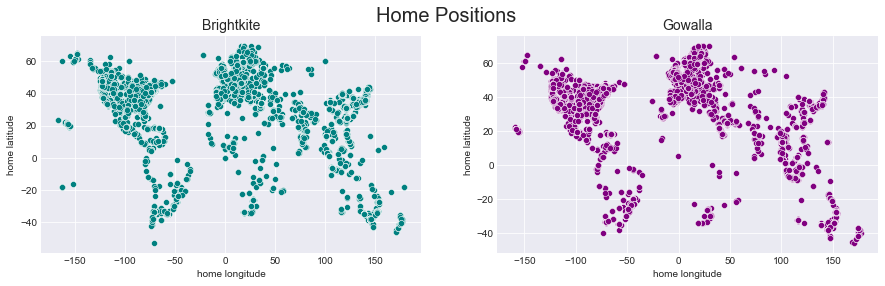

In [25]:
# Plot to show homes
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
fig.suptitle('Home Positions', fontsize=20)

axes[0].set_title('Brightkite', fontsize=14)
sns.scatterplot(ax = axes[0], data=BK_home_df, x='home longitude', y='home latitude', color='teal', legend=False)

axes[1].set_title('Gowalla', fontsize=14)
sns.scatterplot(ax = axes[1], data=GW_home_df, x='home longitude', y='home latitude', color='purple', legend=False)

---
## _Step 4:_ Distance from Friends

We want to combine the user homes data with the social network edge data. After combining the two, we can find the probability density function of the distance between friends like in the paper. We follow three steps:
1. Create a dataframe containing edge and location information
2. Find the distance between friend's homes
3. Plot the probability density function of said distances

---
### 4.1 Edge and location dataframe

First we visualise a friendship network to be reminded of what it contains.

In [26]:
# Visual reminder of the edges dataframe
BK_edges_df.head(3)

,user,friendship
0,0,1
1,0,2
2,0,3


We create a function that takes home location information and combines it to the friendship network data. It then adds each user's home location as well as the friend's home location. With all of this information in a single dataframe, it will be easy to exctract distance between friend information.

In [27]:
# Function that creates dataframe with friendships and locations
def user_friend_location(edges_df, home_df):
    # Input:
    # -- edges_df: a pandas dataframe containing frienship networks
    # -- home_df: a pandas dataframe containing the home location of each user
    # Output:
    # -- edge_location_df: a pandas dataframe containing the and frienship networks the home location of each user

    # Create new datagram by merging edges and homes to show user home location
    edge_location_df = pd.merge(edges_df, home_df, on='user')

    # Create new dataframe from user homes, with new names to merge with edges dataframe
    friend_df = home_df.copy()
    friend_df.columns = ['friendship', 'friend latitude', 'friend longitude']

    # Merge with previous dataframe to have user friendships, home location and friend home locations
    edge_location_df = pd.merge(edge_location_df, friend_df, on='friendship')

    # Sort by user and friendship and reset index to stay consistent
    edge_location_df = edge_location_df.sort_values(by=['user', 'friendship']).reset_index(drop=True)
    
    return edge_location_df

We apply function to combine friendship network and home location information to both social networks.

In [28]:
BK_home_df[BK_home_df.user == 73]

,user,home latitude,home longitude


In [29]:
# Create dataframe with friendships and locations
BK_edge_location_df = user_friend_location(BK_edges_df, BK_home_df)
GW_edge_location_df = user_friend_location(GW_edges_df, GW_home_df)

We visualise the combined dataframe.

In [30]:
# Visualise Data
BK_edge_location_df.head(3)

,user,friendship,home latitude,home longitude,friend latitude,friend longitude
0,0,1,39.7864,-105.006965,37.602529,-122.381625
1,0,2,39.7864,-105.006965,39.780855,-105.015456
2,0,3,39.7864,-105.006965,37.768065,-122.424688


---
### 4.2 Distance between friends

In [31]:
# Function that converts geographical coordinates to distance in km
def geo_to_km(lat_0_deg, lon_0_deg, lat_1_deg, lon_1_deg):
    # Input:
    # -- lat_0_deg: a scalar of latitude of location 0
    # -- lon_0_deg: a scalar of longitude of location 0
    # -- lat_1_deg: a scalar of latitude of location 1
    # -- lon_1_deg: a scalar of longitude of location 1
    # Output:
    # -- d: a scalar of the distance between location 0 and 1
    
    lat_0 = np.deg2rad(lat_0_deg)
    lon_0 = np.deg2rad(lon_0_deg)
    lat_1 = np.deg2rad(lat_1_deg)
    lon_1 = np.deg2rad(lon_1_deg)    
    d_lat = lat_1-lat_0
    d_lon = lon_1-lon_0
    
    a = np.sin(d_lat/2)**2 + np.cos(lat_0)*np.cos(lat_1)*np.sin(d_lon/2)**2   
    d = 6371*2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    return d

# Function that calculates distance between user home and friend home
def calculate_distances(edge_location_df):
    # Input:
    # -- edge_location_df: a pandas dataframe containing the and frienship networks the home location of each user
    # Output:
    # -- friend_distance_df: a pandas dataframe containing the distance between user and friend
    
    # Copy edge and location dataframe
    friend_distance_df = edge_location_df.copy()

    # Create new distance column in created dataframe
    friend_distance_df['distance'] = geo_to_km(friend_distance_df['home latitude'],
                                               friend_distance_df['home longitude'],
                                               friend_distance_df['friend latitude'],
                                               friend_distance_df['friend longitude'])
    
    # Remove unnecessary columns
    friend_distance_df = friend_distance_df.drop(['home latitude', 'home longitude', 'friend latitude', 
                                                  'friend longitude'], axis=1)
    
    # Filter friends with no distance difference
    friend_distance_df = friend_distance_df[friend_distance_df.distance > 0]
    
    return friend_distance_df

We apply the function that calculates the distance between users to each social network dataset.

In [32]:
# Calculate distance to friends home
BK_friend_distance_df = calculate_distances(BK_edge_location_df)
GW_friend_distance_df = calculate_distances(GW_edge_location_df)

We visualise the new dataframe.

In [33]:
# Visualise Data
BK_friend_distance_df.head(3)

,user,friendship,distance
0,0,1,1524.811459
1,0,2,0.952189
2,0,3,1523.968586


---
### 4.3 Probability density function

Note that each distance will appear twice because we consider datasets an undirected friendship network with bi-directional edges. However this won't affect the probability density function because every single distance appears twice.

We first calculate the density histogram of all of the distances found in the previous dataframe. We want to a log-log plot, therefore we use a rescaled version of the bins of the first histogram, converted to a log scale to allow them to be of equal size on the log-log plot. We then use these new bins to plot a new density histogram as shown in the figure below.

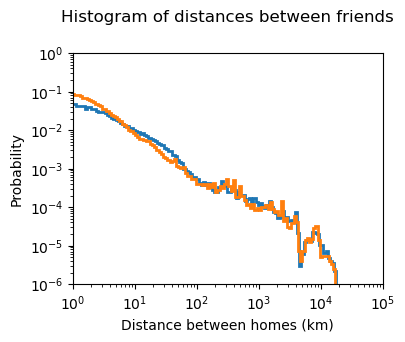

In [34]:
# Change plot style
plt.style.use('default')

# Create linear histogram with linearly spaced bins
_, BK_bins = np.histogram(BK_friend_distance_df['distance'], bins=500)
_, GW_bins = np.histogram(GW_friend_distance_df['distance'], bins=500)

# Create logarithmically spaced bins
BK_logbins = np.logspace(np.log10(BK_bins[0]), np.log10(BK_bins[-1]), len(BK_bins))
GW_logbins = np.logspace(np.log10(GW_bins[0]), np.log10(GW_bins[-1]), len(GW_bins))

# Create and plot new histograms with correct bin size
f, ax = plt.subplots(figsize=(4, 3))

BK_n, BK_bins, _ = plt.hist(BK_friend_distance_df['distance'], 
                            histtype=u'step', bins=BK_logbins, 
                            density=True, linewidth=2)

GW_n, GW_bins, _ = plt.hist(GW_friend_distance_df['distance'], 
                            histtype=u'step', bins=GW_logbins, 
                            density=True, linewidth=2)

ax.set(xscale="log", yscale="log")
ax.set_xlim(1,1e5)
ax.set_ylim(1e-6,1)
plt.ylabel('Probability')
plt.xlabel('Distance between homes (km)')
_ = plt.title('Histogram of distances between friends', y=1.1)

The density histogram gives us the distribution of home distances between friends as we wanted to replicate. All we need to do now is make it look good! We therefore modify a few parameters to make it look like the paper and get the result below.

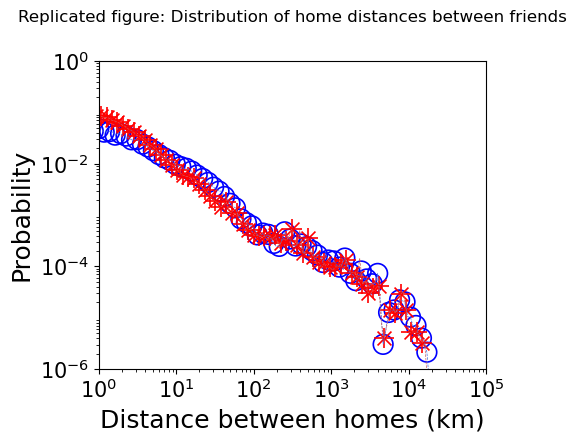

In [35]:
# Get x and y histogram values as x=middle of bins and y=histogram value
BK_x_values = BK_bins[:-1] + 0.5*(BK_bins[1:] - BK_bins[:-1])
BK_y_values = BK_n
GW_x_values = GW_bins[:-1] + 0.5*(GW_bins[1:] - GW_bins[:-1])
GW_y_values = GW_n

# Select every 2nd value for marker 
BK_x_values_marker = BK_x_values[::2]
BK_y_values_marker = BK_y_values[::2]
GW_x_values_marker = GW_x_values[::2]
GW_y_values_marker = GW_y_values[::2]

# Figure
f, ax = plt.subplots(figsize=(5, 4))

# Plot Brightkite data
plt.plot(BK_x_values, BK_y_values, ls='--', color='royalblue', linewidth=0.5)
plt.scatter(BK_x_values_marker, BK_y_values_marker, facecolors='none', edgecolors='b', s=200, linewidth=1.2)

# Plot Gowalla data
plt.plot(GW_x_values, GW_y_values, ls='--', color='indianred', linewidth=0.5)
plt.scatter(GW_x_values_marker, GW_y_values_marker, marker='x', color='r', s=100, linewidth=1.2)
plt.scatter(GW_x_values_marker, GW_y_values_marker, marker='+', color='r', s=200, linewidth=1.2)

# Set scales and limits
ax.set(xscale="log", yscale="log")
ax.set_xlim(1,1e5)
ax.set_ylim(1e-6,1)

# Modify ticks and labels to look like paper
plt.xticks(size = 15)
plt.yticks([1e0, 1e-2, 1e-4, 1e-6], size = 15)
plt.ylabel('Probability', size = 18)
plt.xlabel('Distance between homes (km)', size = 18)
_ = plt.title('Replicated figure: Distribution of home distances between friends', y=1.1)

We can see that our figure, despite being slightly different than the paper, does a good job of showing the same trends as seen in the paper. The ditribution of home distance between friends follows the same behaviour for both social networks, following the same power law with exponential cutoff with the same kink around the 100km mark. This shows that our replication follows the same steps and gives the same results as the paper.

Replication 1: DONE

---

# Replication 2

## Figure 3B: Distribution of home distances between friends

The figure to replicate is the following:

<img src="Figures/3A.png" width=400>

This figure shows the number of friend visiting check-ins as a function of the distance traveled from home, and $P_{null}$, which quantifies the probability that a friend will be within the vicinity of a user if the user would travel “randomly”. The authors observe that the actual influence of a friend on a user making a long distance trip increases with the distance when calculating their ratio.

---

## Step 5: Visiting Friends

The paper wants to investigate sociability of human movement by measuring how likely person A is to travel close to the home of a friend B. To do this we will do the following:
1. Compute the distance between user check-ins and home
2. Merge all the information we have into a single dataset for interpretation
3. Compute whether a check-in is a "visit" or not according to the paper's defintion
4. Plot the results

---
### 5.1 Distance between checkins and home

We merge the home location and checkin location dataframes into a single dataframe. We then compute the distance between check-ins and home. Finally we clean up the dataframe by renaming columns and removing unwanted columns.

In [36]:
# Function that calculates distance between user home and friend home
def checkin_home_distance(checkins_df, home_df):
    # Input:
    # -- checkins_df: a pandas dataframe containing the and frienship networks the home location of each user
    # Output:
    # -- friend_distance_df: a pandas dataframe containing the distance between user and friend
    
    # Create new dataframe with only checkin locations and id
    checkins_dist_df = checkins_df.copy().drop('check-in time', axis=1)

    # Modify dataframe by merging it with home locations
    checkins_dist_df = pd.merge(checkins_dist_df, home_df, on='user')

    # Create a new column with the distance between the checkin and user's home
    checkins_dist_df['distance from home'] = geo_to_km(checkins_dist_df['latitude'],
                                                       checkins_dist_df['longitude'], 
                                                       checkins_dist_df['home latitude'], 
                                                       checkins_dist_df['home longitude'])

    # Remove unnecessary columns
    checkins_dist_df = checkins_dist_df.drop(['home latitude', 'home longitude'], axis=1)

    # Rename columns
    checkins_dist_df.columns = ['user',
                                'checkin latitude', 
                                'checkin longitude', 
                                'location id', 
                                'distance from home']
    
    return checkins_dist_df

We apply the function to the two datasets.

In [37]:
BK_checkins_dist_df = checkin_home_distance(BK_checkins_df, BK_home_df)
GW_checkins_dist_df = checkin_home_distance(GW_checkins_df, GW_home_df)

We visualise the distance between home and checkins dataframe.

In [38]:
# Visualise dataframe
BK_checkins_dist_df.head(3)

,user,checkin latitude,checkin longitude,location id,distance from home
0,0,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5,4.482207
1,0,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2,12.883766
2,0,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79,12.771528


We also want to avoid large and pointless computation, so we remove duplicate locations for each user. However, we need to be careful here because some locations have been visited by multiple users. We don't want to remove duplicates in this case because we would be removing important check-in informtion for some users. We therefore create new location ids that take the location into consideration, as well as the user in the folling form: **new location id = user - location id**.

For example:
* user: 0
* location id: 88c46bf20db295831bd2d1718ad7e6f5
* new location id: 0 - 88c46bf20db295831bd2d1718ad7e6f5

In [39]:
# New location id
BK_new_location_id = BK_checkins_dist_df['user'].astype(str) + ' - ' + BK_checkins_dist_df['location id'].astype(str)
BK_checkins_dist_df['location id'] = BK_new_location_id

GW_new_location_id = GW_checkins_dist_df['user'].astype(str) + ' - ' + GW_checkins_dist_df['location id'].astype(str)
GW_checkins_dist_df['location id'] = GW_new_location_id

This step will also allow for better grouping during later operations.

We visualise the distance between home and checkins dataframe.

In [40]:
# Visualise dataframe
BK_checkins_dist_df.head(3)

,user,checkin latitude,checkin longitude,location id,distance from home
0,0,39.747652,-104.992510,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207
1,0,39.891383,-105.070814,0 - 7a0f88982aa015062b95e3b4843f9ca2,12.883766
2,0,39.891077,-105.068532,0 - dd7cd3d264c2d063832db506fba8bf79,12.771528


---
### 5.2 Merging all of the information

We want to create a dataframe containing check-in information for each user, user friendship networks, and friend home locations.

We first create a dataframe with friendship home location information. Luckily we have already created the **XX_edge_location_df** dataframes in step 4.1. We don't need user home locations, but only friend home locations so we remove the unwanted columns.

In [41]:
# Remove unnecessary columns
BK_friend_location_df = BK_edge_location_df.drop(['home latitude', 'home longitude'], axis=1)
GW_friend_location_df = GW_edge_location_df.drop(['home latitude', 'home longitude'], axis=1)

# Rename columns
BK_friend_location_df.columns = ['user', 'friend', 'friend latitude', 'friend longitude']
GW_friend_location_df = GW_edge_location_df.drop(['home latitude', 'home longitude'], axis=1)

We visualise the new friendship location information dataframe.

In [42]:
# Visualise dataframe
BK_friend_location_df.head(3)

,user,friend,friend latitude,friend longitude
0,0,1,37.602529,-122.381625
1,0,2,39.780855,-105.015456
2,0,3,37.768065,-122.424688


We now merge the this dataframe with the one created in 5.1. We will therefore have a single dataframe with checkin information for each user, as well as friend home locations. This will allow us to compare the distance between a users checkin and each of his friend's home.

In [43]:
# Merge on user
BK_checkin_friend_df = pd.merge(BK_checkins_dist_df, BK_friend_location_df, on='user')
GW_checkin_friend_df = pd.merge(GW_checkins_dist_df, GW_friend_location_df, on='user')

We visualise the created dataframe.

In [44]:
# Visualise dataframe
BK_checkin_friend_df.head(3)

,user,checkin latitude,checkin longitude,location id,distance from home,friend,friend latitude,friend longitude
0,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,1,37.602529,-122.381625
1,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,2,39.780855,-105.015456
2,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,3,37.768065,-122.424688


---
### 5.3 Visiting friends

We now verify if for each checkin, a user visits a friend. We defining visiting a friend the same way as in the paper: "user $A$ “visits” her friend $B$ if $A$ checks-in within radius $r$ of $B$’s home". We also define $r=25km$ as in the paper.

We calculate the distance between each user check-in, and each of the user's friend's homes. and create a new column in the dataframe. We then set the value to $0$ or $1$ according to the definition of a "visit".

In [45]:
# Compute distance between checkin location and friend homes
BK_checkin_friend_df['visit'] = geo_to_km(BK_checkin_friend_df['checkin latitude'], 
                                          BK_checkin_friend_df['checkin longitude'], 
                                          BK_checkin_friend_df['friend latitude'], 
                                          BK_checkin_friend_df['friend longitude'])

GW_checkin_friend_df['visit'] = geo_to_km(GW_checkin_friend_df['checkin latitude'], 
                                          GW_checkin_friend_df['checkin longitude'], 
                                          GW_checkin_friend_df['friend latitude'], 
                                          GW_checkin_friend_df['friend longitude'])

# Change from distance to bool
BK_checkin_friend_df.loc[BK_checkin_friend_df['visit'] < 25, 'visit'] = 1
BK_checkin_friend_df.loc[BK_checkin_friend_df['visit'] >= 25, 'visit'] = 0
GW_checkin_friend_df.loc[GW_checkin_friend_df['visit'] < 25, 'visit'] = 1
GW_checkin_friend_df.loc[GW_checkin_friend_df['visit'] >= 25, 'visit'] = 0

We visualise the dataframe with the new column.

In [46]:
BK_checkin_friend_df.head(3)

,user,checkin latitude,checkin longitude,location id,distance from home,friend,friend latitude,friend longitude,visit
0,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,1,37.602529,-122.381625,0.0
1,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,2,39.780855,-105.015456,1.0
2,0,39.747652,-104.99251,0 - 88c46bf20db295831bd2d1718ad7e6f5,4.482207,3,37.768065,-122.424688,0.0


We now group the dataset by the location id to know if for each check-in location for each user, a friend was visited.

In [ ]:
# Groupby location id
BK_friend_visit = BK_checkin_friend_df.groupby('location id')['visit'].any().astype(int)
GW_friend_visit = GW_checkin_friend_df.groupby('location id')['visit'].any().astype(int)

Finally we merge the the information on whether a friend is visited or not with the original dataframe containing the distance of a check-in from home.

In [ ]:
# Merge visits with checkin distance from home dataframe
BK_friend_visit_df = pd.merge(BK_checkins_dist_df, BK_friend_visit, on='location id')
GW_friend_visit_df = pd.merge(GW_checkins_dist_df, GW_friend_visit, on='location id')

We visualise the created dataframe.

In [ ]:
# Visualise dataframe
BK_friend_visit_df

---
### 5.4 Computing and plotting

In [ ]:
BK_total_df = BK_friend_visit_df[BK_friend_visit_df['distance from home'] > 0]
GW_total_df = GW_friend_visit_df[GW_friend_visit_df['distance from home'] > 0]
BK_visit_df = BK_total_df[BK_total_df.visit == 1]
GW_visit_df = GW_total_df[GW_total_df.visit == 1]

In [ ]:
# Change plot style
plt.style.use('default')

# Create linear histogram with linearly spaced bins
_, BK_bins = np.histogram(BK_total_df['distance from home'], bins=250)

# Create logarithmically spaced bins
BK_logbins = np.logspace(np.log10(BK_bins[0]), np.log10(BK_bins[-1]), len(BK_bins))

# Create and plot new histograms with correct bin size
f, ax = plt.subplots(figsize=(4, 3))

BK_n_tot, BK_bins, _ = plt.hist(BK_total_df['distance from home'], 
                            histtype=u'step', bins=BK_logbins, 
                            density=True, linewidth=2)
BK_n_visit, _, _ = plt.hist(BK_visit_df['distance from home'], 
                            histtype=u'step', bins=BK_logbins, 
                            density=True, linewidth=2)

ax.set(xscale="log", yscale="log")
ax.set_xlim(1,1e5)
ax.set_ylim(1e-3,1)
plt.ylabel('Probability')
plt.xlabel('Distance between homes (km)')
_ = plt.title('Histogram of distances between friends', y=1.1)

In [ ]:
# Change plot style
plt.style.use('default')

# Create linear histogram with linearly spaced bins
_, GW_bins = np.histogram(GW_total_df['distance from home'], bins=250)

# Create logarithmically spaced bins
GW_logbins = np.logspace(np.log10(GW_bins[0]), np.log10(GW_bins[-1]), len(GW_bins))

# Create and plot new histograms with correct bin size
f, ax = plt.subplots(figsize=(4, 3))

GW_n_tot, GW_bins, _ = plt.hist(GW_total_df['distance from home'], 
                            histtype=u'step', bins=GW_logbins, 
                            density=True, linewidth=2)
GW_n_visit, _, _ = plt.hist(GW_visit_df['distance from home'], 
                            histtype=u'step', bins=GW_logbins, 
                            density=True, linewidth=2)

ax.set(xscale="log", yscale="log")
ax.set_xlim(1,1e5)
ax.set_ylim(1e-3,1)
plt.ylabel('Probability')
plt.xlabel('Distance between homes (km)')
_ = plt.title('Histogram of distances between friends', y=1.1)

In [ ]:
N = 2

# Get x and y histogram values as x=middle of bins and y=histogram value
BK_x_values = (BK_bins[:-1] + 0.5*(BK_bins[1:] - BK_bins[:-1]))[::N]
end = len(BK_x_values)
BK_x_values = [x for x in BK_x_values if x > 20]
start = end-len(BK_x_values)
BK_y_values = (BK_n_visit/BK_n_tot)[::N]
BK_y_values = BK_y_values[start:end]

GW_x_values = (GW_bins[:-1] + 0.5*(GW_bins[1:] - GW_bins[:-1]))[::N]
end = len(GW_x_values)
GW_x_values = [x for x in GW_x_values if x > 20]
start = end-len(GW_x_values)
GW_y_values = (GW_n_visit/GW_n_tot)[::N]
GW_y_values = GW_y_values[start:end]

# Figure
f, ax = plt.subplots(figsize=(5, 4))

# Plot data
plt.plot(BK_x_values, BK_y_values, color='b', linewidth=1.2)
plt.plot(GW_x_values, GW_y_values, color='r', linewidth=1.2)
plt.scatter(BK_x_values, BK_y_values, facecolors='none', edgecolors='b', s=200, linewidth=1.2)
plt.scatter(GW_x_values, GW_y_values, marker='x', color='r', s=100, linewidth=1.2)
plt.scatter(GW_x_values, GW_y_values, marker='+', color='r', s=200, linewidth=1.2)

# Set scales and limits
ax.set(xscale="log", yscale="log")
ax.set_xlim(10,1e5)
ax.set_ylim(1e-3,1)

# Modify ticks and labels to look like paper
plt.xticks(size = 15)
plt.yticks([1e0, 1e-1, 1e-2, 1e-3], size = 15)
plt.ylabel('Probability', size = 18)
plt.xlabel('Distance between homes (km)', size = 18)
_ = plt.title('Replicated figure: Distribution of home distances between friends', y=1.1)

---